# Bank Marketing Data Set

## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**

## Attribute Information:

### Input variables:

##### Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')

6 - housing: has housing loan? (categorical: 'no',' yes', 'unknown')

7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')


##### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular', 'telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

11 - duration: last contact duration, in seconds (numeric). 


##### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')


##### Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

# Setup Imports and Variables

In [1]:
import pandas as pd
import numpy as np
#import pylab as plt
import matplotlib.pyplot as plt


# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
figsize_with_subplots = (18, 30)

# Size of matplotlib histogram bins
bin_size = 10

# Importing data, Exploratory Data Analysis and Imputing Missing values

## Import and Explore Data

Read the data:

In [2]:
df = pd.read_csv('bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


View the data types of each column:

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Get some basic information on the DataFrame:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

job, marital, education, default, housing and loan have missing values. 

Generate various descriptive statistics on the DataFrame:

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Now that we have a general idea of the data set contents, we can dive deeper into each column. 
We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

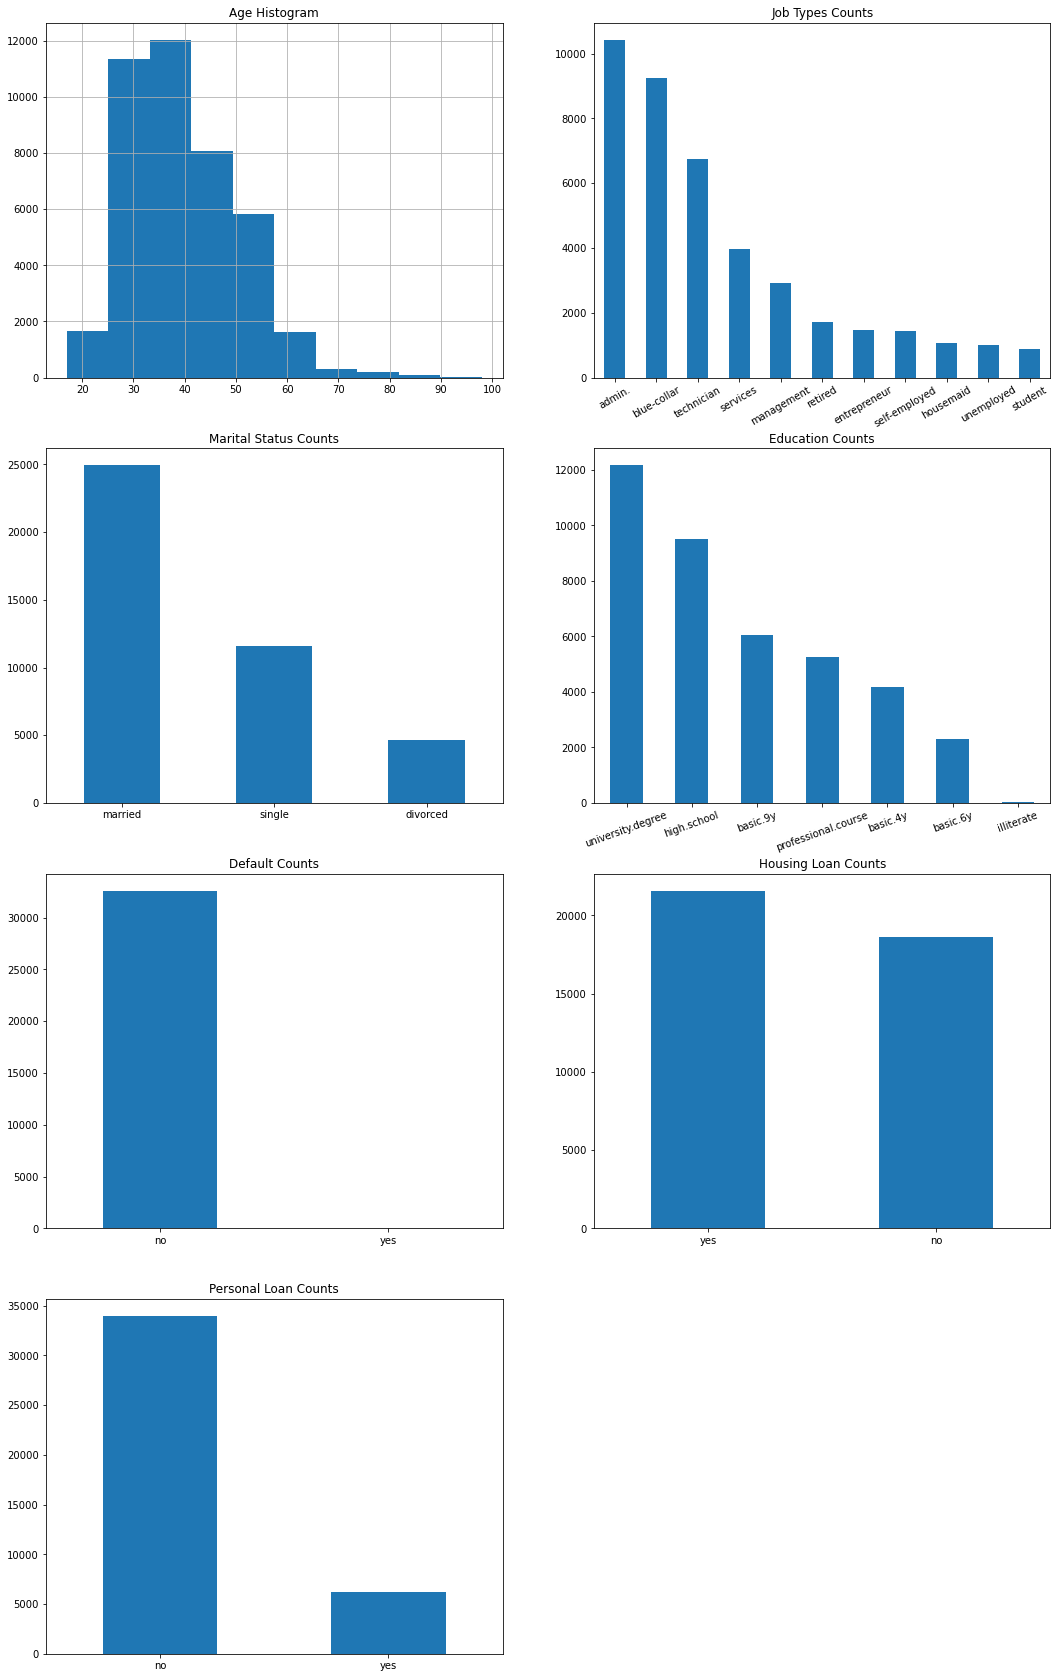

In [8]:
# Set up a grid of plots
fig = plt.figure(figsize=figsize_with_subplots) 
fig_dims = (4, 2)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (0, 0))
df['age'].hist()
plt.title('Age Histogram')

# Plot job types counts
plt.subplot2grid(fig_dims, (0, 1))
df['job'].value_counts().plot(kind='bar', title='Job Types Counts')
plt.xticks(rotation=30)

# Plot marital status counts
plt.subplot2grid(fig_dims, (1, 0))
df['marital'].value_counts().plot(kind='bar', title='Marital Status Counts')
plt.xticks(rotation=0)

# Plot education counts
plt.subplot2grid(fig_dims, (1, 1))
df['education'].value_counts().plot(kind='bar', title='Education Counts')
plt.xticks(rotation=20)

# Plot 'has credit in default?' counts
plt.subplot2grid(fig_dims, (2, 0))
df['default'].value_counts().plot(kind='bar', title='Default Counts')
plt.xticks(rotation=0)

# Plot 'has housing loan?' counts
plt.subplot2grid(fig_dims, (2, 1))
df['housing'].value_counts().plot(kind='bar', title='Housing Loan Counts')
plt.xticks(rotation=0)

# Plot 'has personal loan?' counts
plt.subplot2grid(fig_dims, (3, 0))
df['loan'].value_counts().plot(kind='bar', title='Personal Loan Counts')
plt.xticks(rotation=0)



Next we'll explore various features to view their impact on term deposit subscription.

## Feature: Age

Determine the Age typical for each passenger class by Sex. We'll use the median instead of the mean because the Age histogram seems to be right skewed.## Feature Age

Determine the Age typical for subscribed and unsubscribed clients. We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [9]:
df[['age', 'y']].groupby('y').median()

,age
y,
no,38
yes,37


We find the age distribution for subscribed and unsubscribed clients

Text(0, 0.5, 'Count')

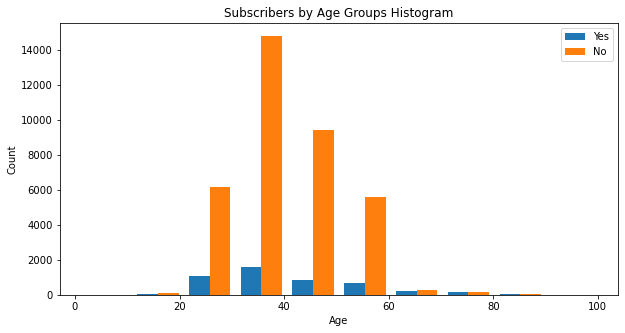

In [10]:
df1 = df[df['y'] == 'yes']['age']
df2 = df[df['y'] == 'no']['age']

plt.hist([df1, df2], bins= 10, range=(1, 100))
plt.legend(('Yes', 'No'), loc='best')
plt.title('Subscribers by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')

* We see that most clients contacted are in the range of age 20 to 60.

* Most subscriptions came from the age group 30 to 40 as shown in the graph above.

## Feature: Job

<AxesSubplot:title={'center':'Subscription by Job'}, xlabel='job'>

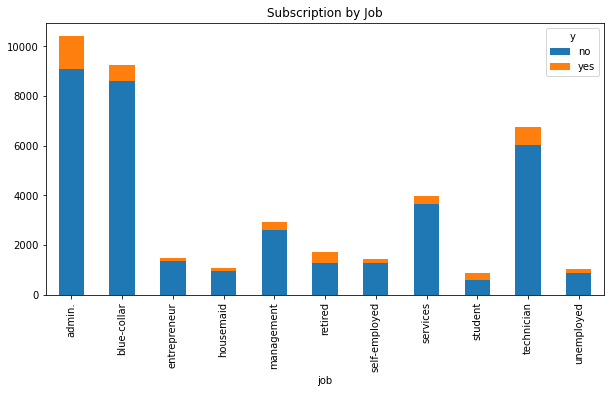

In [11]:
job_val_xt = pd.crosstab(df['job'], df['y'])
job_val_xt.plot(kind = 'bar', stacked=True, title='Subscription by Job')

<AxesSubplot:title={'center':'Subscription Rate by Job'}, xlabel='job'>

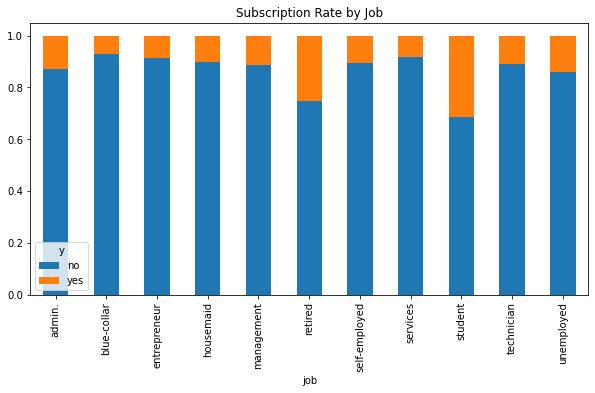

In [12]:
job_val_xt_pct = job_val_xt.div(job_val_xt.sum(1).astype(float), axis=0)
job_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Job')

* Clients with administrative job are contacted more than other clients as they have the most subscriptions. 
* Entreprenuer and self-employed clients are contacted less and also have less subscription of term-deposit as they would prefer to invest their money in their own businesses.
* Housemaid, retired, student and unemployed are also contacted less compared to other clients. 
* But you can see that the Subscription Rate for retired and students is the highest. More students and retired clients can be contacted to improve subscription rate.

In [13]:
df.job.isna().sum()

330

In [14]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

Imputing missing values:

Since the majority of clients have job 'admin.' we assign the missing values in job to 'admin.'.

In [15]:
df['job'].replace(np.NaN, 'admin.',inplace = True)

## Feature: Marital

<AxesSubplot:title={'center':'Subscription by Marital'}, xlabel='marital'>

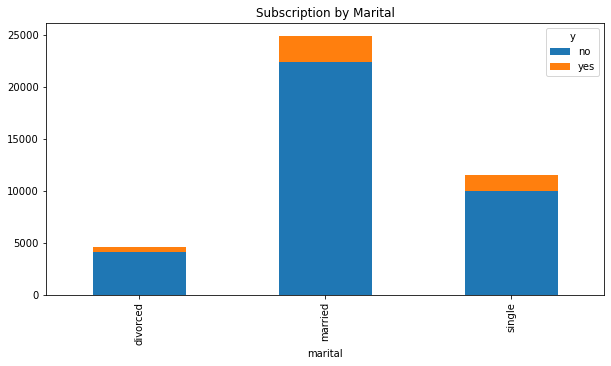

In [16]:
marital_val_xt = pd.crosstab(df['marital'], df['y'])
marital_val_xt.plot(kind = 'bar', stacked=True, title='Subscription by Marital')

<AxesSubplot:title={'center':'Subscription Rate by Marital'}, xlabel='marital'>

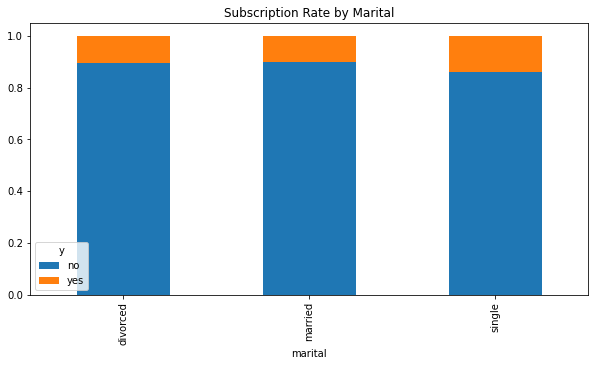

In [17]:
marital_val_xt_pct = marital_val_xt.div(marital_val_xt.sum(1).astype(float), axis=0)
marital_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Marital')

* We see that most clients contacted and most term deposit subscriptions came from clients who are married eventhough the subscription rate is almost equal in all categories.

In [18]:
df.marital.isna().sum()

80

In [19]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

Imputing missing values:

Since the majority of clients have marital status as 'married' we assign the missing values in marital to 'married'.

In [20]:
df['marital'].replace(np.NaN, 'married',inplace = True)

## Feature: Education

<AxesSubplot:title={'center':'Subscription by Education'}, xlabel='education'>

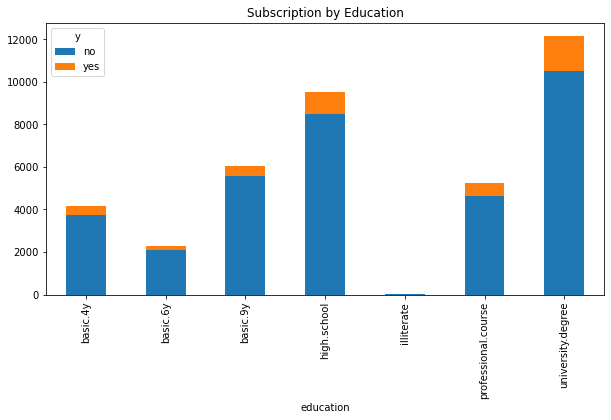

In [21]:
education_val_xt = pd.crosstab(df['education'], df['y'])
education_val_xt.plot(kind = 'bar', stacked=True, title='Subscription by Education')

<AxesSubplot:title={'center':'Subscription Rate by Education'}, xlabel='education'>

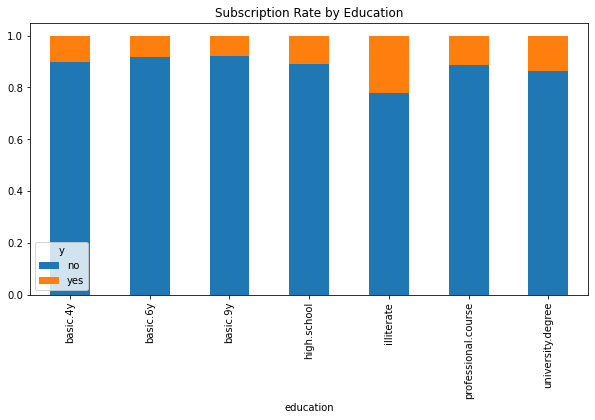

In [22]:
education_val_xt_pct = education_val_xt.div(education_val_xt.sum(1).astype(float), axis=0)
education_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Education')

In [23]:
df.education.isna().sum()

1731

In [24]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

Imputing missing values:

Since the majority of clients have education as 'university.degree' we assign the missing values in education to 'university.degree'.

In [25]:
df['education'].replace(np.NaN, 'university.degree',inplace = True)

## Feature: Default

<AxesSubplot:title={'center':'Subscription Rate by Default'}, xlabel='default'>

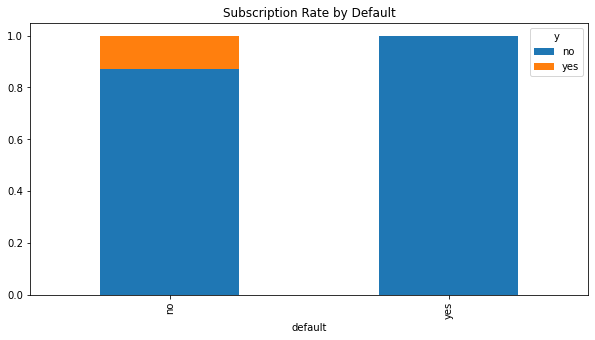

In [26]:
default_val_xt = pd.crosstab(df['default'], df['y'])
default_val_xt_pct = default_val_xt.div(default_val_xt.sum(1).astype(float), axis=0)
default_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Default')

If the client has credit in default, he will not subscribe for the term loan

In [27]:
df.default.isna().sum()

8597

In [28]:
df.default.value_counts()

no     32588
yes        3
Name: default, dtype: int64

Imputing missing values:

Since the majority of clients have default as 'no' we assign the missing values in default to 'no'.

In [29]:
df['default'].replace(np.NaN, 'no',inplace = True)

## Feature: Housing

<AxesSubplot:title={'center':'Subscription by Housing Loan'}, xlabel='housing'>

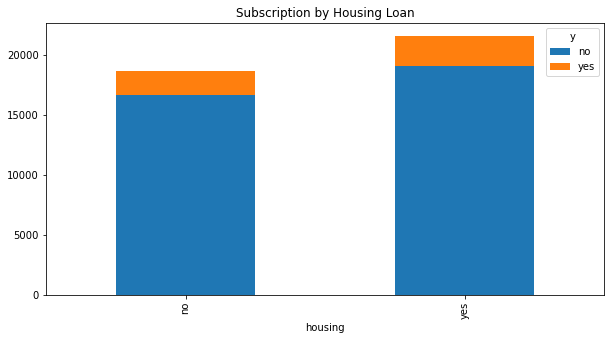

In [30]:
housing_val_xt = pd.crosstab(df['housing'], df['y'])
housing_val_xt.plot(kind = 'bar', stacked=True, title='Subscription by Housing Loan')

<AxesSubplot:title={'center':'Subscription Rate by Housing Loan'}, xlabel='housing'>

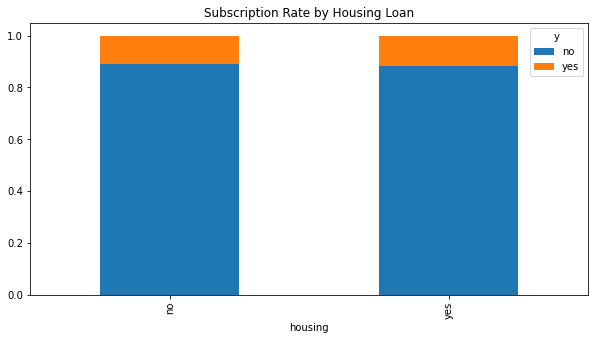

In [31]:
housing_val_xt_pct = housing_val_xt.div(housing_val_xt.sum(1).astype(float), axis=0)
housing_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Housing Loan')

In [32]:
df.housing.isna().sum()

990

In [33]:
df.housing.value_counts()

yes    21576
no     18622
Name: housing, dtype: int64

Imputing missing values:

Since the majority of clients have housing as 'yes' we assign the missing values in housing to 'yes'.

In [34]:
df['housing'].replace(np.NaN, 'yes',inplace = True)

## Feature: Loan

In [35]:
df.loan.isna().sum()

990

In [36]:
df.loan.value_counts()

no     33950
yes     6248
Name: loan, dtype: int64

Imputing missing values:

Since the majority of clients have housing as 'yes' we assign the missing values in housing to 'yes'.

In [37]:
df['loan'].replace(np.NaN, 'no',inplace = True)

## Making lists of variable types for numerical and categorical data

In [38]:
categorical = [var for var in df.columns if df[var].dtype == 'O' and var != 'y']

discrete = [var for var in df.columns if df[var].dtype != 'O' and len(df[var].unique()) < 20 
            and var != 'y']

continuous = [var for var in df.columns if df[var].dtype != 'O'and var not in discrete and var != 'y']

print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(categorical)} categorical variables')

There are 7 continuous variables
There are 3 discrete variables
There are 10 categorical variables


## Checking the distribution of the continuous variables via distplots

C:\Users\neema\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\neema\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\neema\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

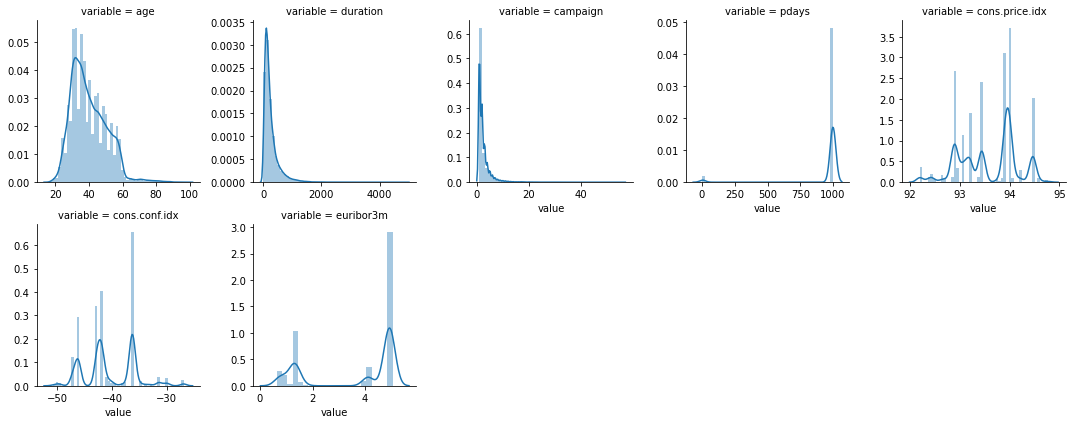

In [39]:
import seaborn as sns
nd = pd.melt(df, value_vars = continuous)
n1 = sns.FacetGrid (nd, col = 'variable', col_wrap = 5, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

## Exploring the distribution of the categorical features via histograms

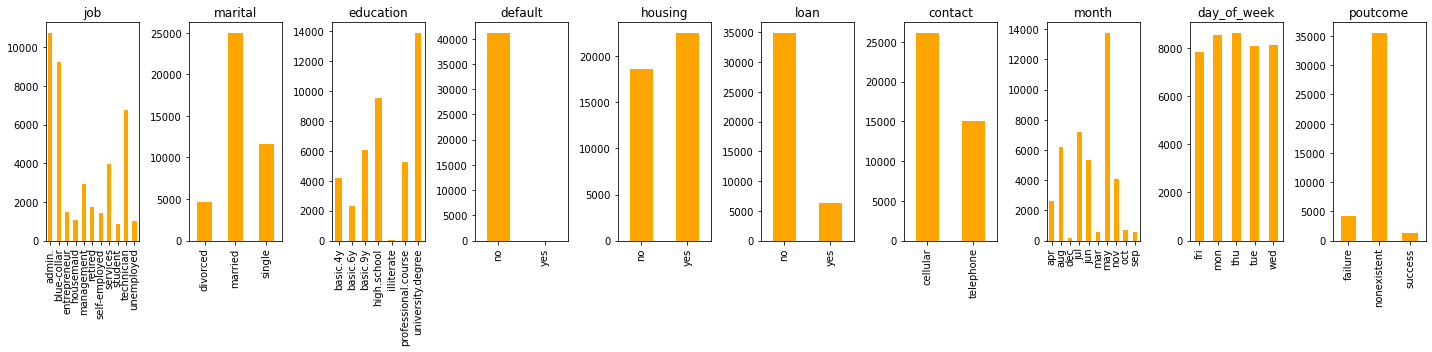

In [40]:
fig, axes = plt.subplots(ncols = len(categorical), figsize=(20,5))
for col, ax in zip(categorical, axes):
    df[col].value_counts().sort_index().plot.bar(ax=ax, title=col, color=['orange'])

plt.tight_layout()    
plt.show()

## Correlation Matrix

In [41]:
import seaborn as sns

<ipython-input-42-209e9ee9a6bf>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


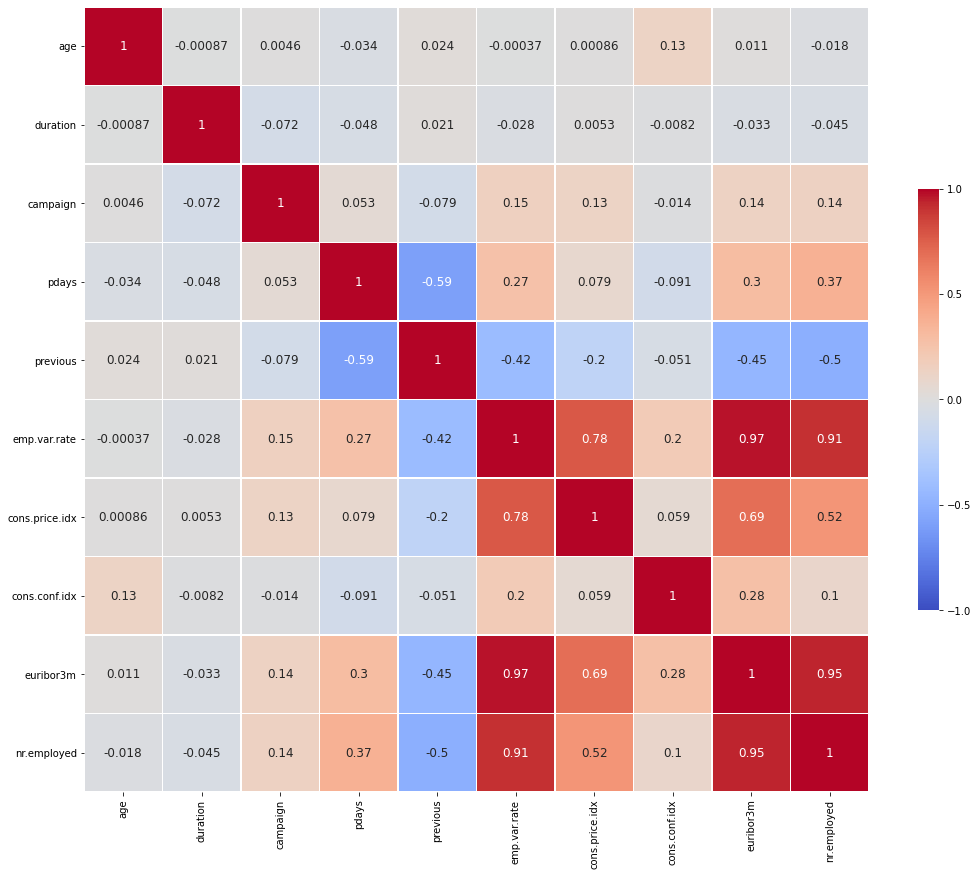

In [42]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
f, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(df.corr(), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(df.corr().columns, rotation = 0)
ax.set_xticklabels(df.corr().columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.tight_layout()

# Data Preprocessing 

In [43]:
X = df.drop('y', axis=1)
y = df['y']

## Handling Categorical values

We map the target value **y** as 'yes' to 1 and 'no' to 0.

In [44]:
y = y.map({'yes':1, 'no':0}).astype(int)

We replace the column **job** with a one-hot-vector of length 11.

In [45]:
cols = pd.get_dummies(X['job'], prefix= 'job')
X[cols.columns] = cols
X.drop('job', axis = 1, inplace = True)

We replace the column **marital** with a one-hot-vector of length 3.

In [46]:
cols = pd.get_dummies(X['marital'], prefix= 'marital')
X[cols.columns] = cols
X.drop('marital', axis = 1, inplace = True)

We replace the column **education** with a one-hot-vector of length 7.

In [47]:
cols = pd.get_dummies(X['education'], prefix= 'education')
X[cols.columns] = cols
X.drop('education', axis = 1, inplace = True)

The frequent class in column **default** is no, so we map 'no' to 1 and 'yes' to 0.

In [48]:
X['default'] = X['default'].map({'no':1, 'yes':0}).astype(int)

The frequent class in column **housing** is yes, so we map 'yes' to 1 and 'no' to 0.

In [49]:
X['housing'] = X['housing'].map({'yes':1, 'no':0}).astype(int)

The frequent class in column **loan** is no, so we map 'no' to 1 and 'yes' to 0.

In [50]:
X['loan'] = X['loan'].map({'no':1, 'yes':0}).astype(int)

The frequent class in column **contact** is cellular, so we map 'cellular' to 1 and 'telephone' to 0.

In [51]:
X['contact'] = X['contact'].map({'cellular':1, 'telephone':0}).astype(int)

We replace the column **month** with a one-hot-vector of length 12.

In [52]:
cols = pd.get_dummies(X['month'], prefix= 'month')
X[cols.columns] = cols
X.drop('month', axis = 1, inplace = True)

We replace the column **day_of_week** with a one-hot-vector of length 7.

In [53]:
cols = pd.get_dummies(X['day_of_week'], prefix= 'day_of_week')
X[cols.columns] = cols
X.drop('day_of_week', axis = 1, inplace = True)

We replace the column **poutcome** with a one-hot-vector of length 3.

In [54]:
cols = pd.get_dummies(X['poutcome'], prefix= 'poutcome')
X[cols.columns] = cols
X.drop('poutcome', axis = 1, inplace = True)

## Splitting Data

Splitting data into train, valid and test sets

In [55]:
from sklearn.model_selection import train_test_split

# split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


print("Size of training set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 30891   size of test set: 10297



In [56]:
X_train.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
10685,52,1,0,1,0,676,2,999,0,1.4,...,0,0,0,0,0,1,0,0,1,0
224,40,1,0,1,0,168,1,999,0,1.1,...,0,0,0,1,0,0,0,0,1,0
29638,28,1,1,1,1,187,1,999,0,-1.8,...,0,0,0,1,0,0,0,0,1,0
4804,52,1,0,1,0,68,1,999,0,1.1,...,0,0,0,0,0,0,1,0,1,0
11614,35,1,0,1,0,81,2,999,0,1.4,...,0,0,1,0,0,0,0,0,1,0


## Dummy Classifier - Base model

In [57]:
y_train.value_counts()

0    27409
1     3482
Name: y, dtype: int64

The dataset is imbalanced as the count of yes(subscribed a term deposit) is much lower than no(not subscribed a term deposit).

First, we build a Dummy Classifier model. 

In [58]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [0]
Test score: 0.89


## Dropping unwanted features
'duration' is the last contact duration, in seconds (numeric).

This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.

Also, after the end of the call y is obviously known. Thus, this feature should only be included for benchmark purposes and should be discarded to have a realistic predictive model.

In [59]:
X_train = X_train.drop('duration', axis=1)
X_test = X_test.drop('duration', axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30891 entries, 10685 to 2732
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30891 non-null  int64  
 1   default                        30891 non-null  int32  
 2   housing                        30891 non-null  int32  
 3   loan                           30891 non-null  int32  
 4   contact                        30891 non-null  int32  
 5   campaign                       30891 non-null  int64  
 6   pdays                          30891 non-null  int64  
 7   previous                       30891 non-null  int64  
 8   emp.var.rate                   30891 non-null  float64
 9   cons.price.idx                 30891 non-null  float64
 10  cons.conf.idx                  30891 non-null  float64
 11  euribor3m                      30891 non-null  float64
 12  nr.employed                    30891 non-nu

In [60]:
X_train.describe()

,age,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.00000,30891.000000,30891.000000,30891.000000,...,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000
mean,39.965848,0.999935,0.546923,0.849050,0.635849,2.562008,962.51481,0.171474,0.081878,93.576382,...,0.017902,0.014179,0.189440,0.207245,0.209705,0.194490,0.199119,0.102133,0.864459,0.033408
std,10.424467,0.008046,0.497801,0.358006,0.481199,2.767311,186.81696,0.492702,1.573389,0.579168,...,0.132596,0.118230,0.391864,0.405339,0.407105,0.395814,0.399345,0.302828,0.342306,0.179702
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,-3.400000,92.201000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,1.000000,0.000000,1.000000,999.00000,0.000000,-1.800000,93.075000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,1.000000,1.000000,1.000000,1.000000,2.000000,999.00000,0.000000,1.100000,93.749000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,1.000000,1.000000,1.000000,1.000000,3.000000,999.00000,0.000000,1.400000,93.994000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,56.000000,999.00000,7.000000,1.400000,94.767000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Scaling the features

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='duration', ylabel='age'>,
        <AxesSubplot:xlabel='campaign', ylabel='age'>,
        <AxesSubplot:xlabel='pdays', ylabel='age'>,
        <AxesSubplot:xlabel='previous', ylabel='age'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='age'>,
        <AxesSubplot:xlabel='cons.price.idx', ylabel='age'>,
        <AxesSubplot:xlabel='cons.conf.idx', ylabel='age'>,
        <AxesSubplot:xlabel='euribor3m', ylabel='age'>,
        <AxesSubplot:xlabel='nr.employed', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='duration'>,
        <AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='campaign', ylabel='duration'>,
        <AxesSubplot:xlabel='pdays', ylabel='duration'>,
        <AxesSubplot:xlabel='previous', ylabel='duration'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='duration'>,
        <AxesSubplot:xlabel='cons.price.idx', ylabel='duration'>,
        <AxesSub

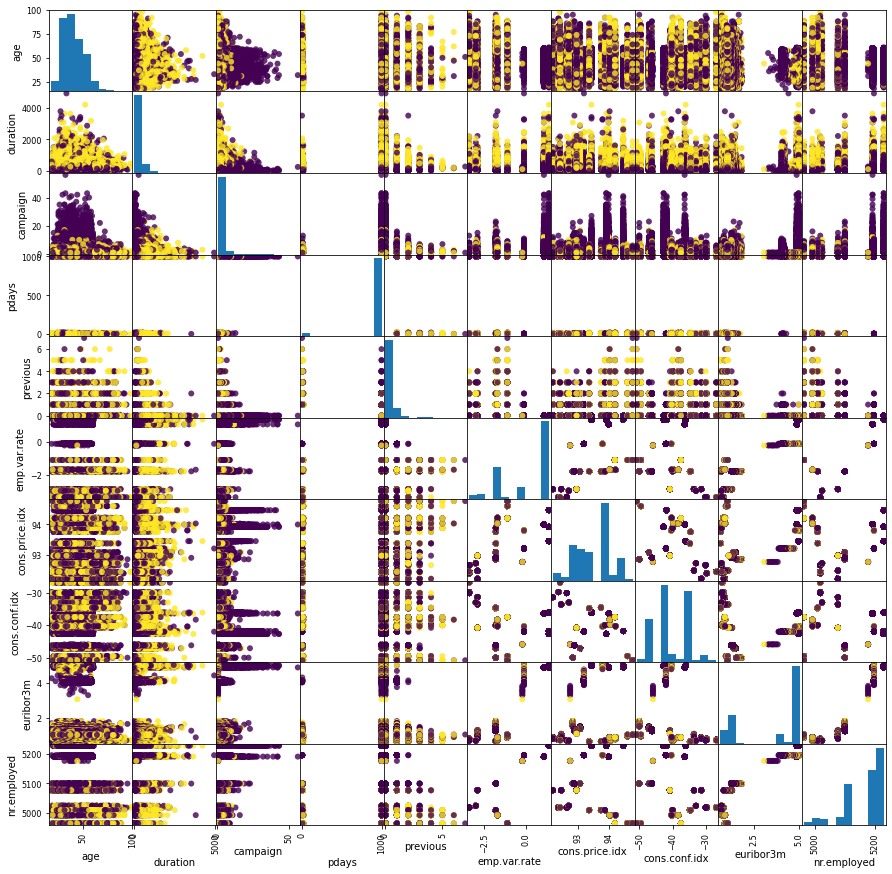

In [61]:
%matplotlib inline
from pandas.plotting import scatter_matrix

X_s = df.drop('y', axis=1)
y_s = df['y']
y_s = y_s.map({'yes':1, 'no':0}).astype(int)
 

attributes = X_s.columns
scatter_matrix(X_s[attributes], figsize = (15,15), c = y_s, alpha = 0.8, marker = 'O')

As we can clearly see that data for almost all the statistical varaibales is not normally distributed, hence we will use MinMaxScaller to scale the data.

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Evaluation Strategy

- Using accuracy as the metric is not optimal to making the best prediction especially due to the fact that our data set is imbalanced
- For Ex: Suppose we have 80% of the data points of just class A ; 
    we can achieve 80% accuracy by just making every prediction A

- To achieve an optimal result we would like to maximize two components:

    (1) The "True Positive Rate" aka Sensitivity aka Recall. Given by: TP/(TP+FN)

    (2) The Precision - How many of the positive predictions, are in fact correct. Given by: TP/(TP+FP)


- To obtain a balance between both we use F Beta Measure which is given by: (2 x Precision x Recall)/(Precision+Recall)
- F2-measure puts more attention on minimizing false negatives which is critical for our problem statement given that we would not want to lose out on potenttial subscribers.

In [63]:
#creating a scorer for F2 score so that we can given an emphases on the minority class predictions
from sklearn.metrics import fbeta_score, make_scorer
f2score = make_scorer(fbeta_score, beta=2)
f2score

make_scorer(fbeta_score, beta=2)

# K Neighbors Classifier

## Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

#param_grid = {'n_neighbors': [*range(1,20)]}

# Re-run with smaller param set
param_grid = {'n_neighbors': [4,8,11,19]}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [4, 8, 11, 19]}


In [65]:
from sklearn.neighbors import KNeighborsClassifier

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, scoring = f2score, n_jobs= -1, verbose = 4)

In [66]:
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [4, 8, 11, 19]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [69]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 11}
Best cross-validation score: 0.24


In [70]:
# convert to DataFrame
results_knn = pd.DataFrame(grid_search_knn.cv_results_)
# show the first 5 rows
display(results_knn.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.065199,0.030339,98.600917,51.474203,4,{'n_neighbors': 4},0.207779,0.216594,0.185930,0.183578,...,0.199675,0.012831,4,0.306496,0.308293,0.319334,0.308242,0.291420,0.306757,0.008922
1,0.071999,0.024608,105.765387,54.739513,8,{'n_neighbors': 8},0.216306,0.228486,0.198053,0.207289,...,0.213110,0.010125,3,0.264279,0.254096,0.268177,0.266294,0.249519,0.260473,0.007327
2,0.184998,0.086752,53.462121,22.586236,11,{'n_neighbors': 11},0.245308,0.251976,0.233831,0.246037,...,0.243715,0.005985,1,0.283749,0.282218,0.285926,0.284690,0.274466,0.282210,0.004057
3,0.958113,1.600155,39.879580,20.124083,19,{'n_neighbors': 19},0.226667,0.235235,0.220957,0.227882,...,0.226764,0.004905,2,0.242178,0.248268,0.245155,0.240783,0.238474,0.242972,0.003420


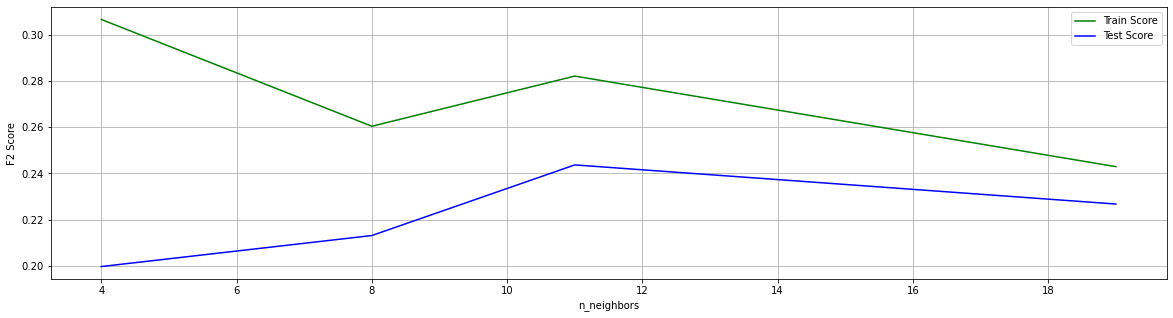

In [74]:
x_axis = np.array([4,8,11,19])
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, np.array(results_knn.mean_train_score), label = 'Train Score', c = 'g')
plt.plot(x_axis, np.array(results_knn.mean_test_score), label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('F2 Score')
plt.grid()
plt.legend()

In [75]:
print('Train score: {:.4f}'.format(grid_search_knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_knn.score(X_test, y_test)))

Train score: 0.2906
Test score: 0.2258


In [77]:
pred_knn = grid_search_knn.predict(X_test)

## Model Evaluation

In [78]:
from sklearn.metrics import confusion_matrix

confusion_knn = confusion_matrix(y_test, pred_knn)
print("Confusion matrix:\n{}".format(confusion_knn))

Confusion matrix:
[[8971  168]
 [ 931  227]]


In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_knn, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.57      0.20      0.29      1158

    accuracy                           0.89     10297
   macro avg       0.74      0.59      0.62     10297
weighted avg       0.87      0.89      0.87     10297



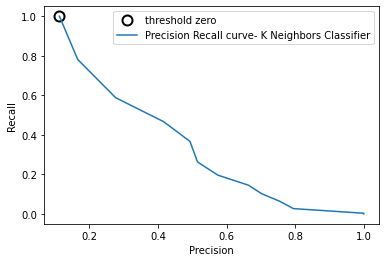

In [80]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, grid_search_knn.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_knn))

plt.plot(precision_knn[close_zero], recall_knn[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_knn, recall_knn, label="Precision Recall curve- K Neighbors Classifier")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

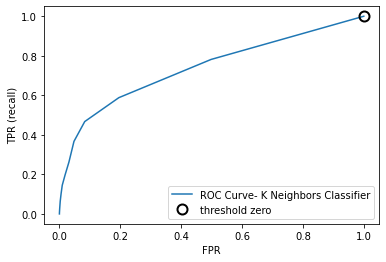

In [81]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, grid_search_knn.predict_proba(X_test)[:, 1])

plt.plot(fpr_knn, tpr_knn, label="ROC Curve- K Neighbors Classifier")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_knn))
plt.plot(fpr_knn[close_zero], tpr_knn[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Logistic Regression

## Hyperparameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
             
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [83]:
from sklearn.linear_model import LogisticRegression

grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=500, penalty='l2'), param_grid, cv=5, return_train_score=True, scoring= f2score, n_jobs= -1, verbose = 4)


In [84]:
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [85]:
print("Best parameters: {}".format(grid_search_logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logreg.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.27


In [86]:
# convert to DataFrame
results_logreg = pd.DataFrame(grid_search_logreg.cv_results_)
# show the first 5 rows
display(results_logreg.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.367598,0.029153,0.008400,0.001355,0.001,{'C': 0.001},0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.598397,0.045355,0.007200,0.000748,0.01,{'C': 0.01},0.212336,0.219669,0.185248,0.212766,...,0.207318,0.011790,6,0.209355,0.203097,0.214895,0.209178,0.207593,0.208824,0.003783
2,1.003799,0.195815,0.007599,0.001201,0.1,{'C': 0.1},0.258364,0.267087,0.227349,0.250000,...,0.249357,0.013484,5,0.255568,0.242804,0.249042,0.251290,0.246332,0.249007,0.004334
3,2.284599,0.348471,0.006204,0.000399,1,{'C': 1},0.269066,0.278694,0.235078,0.264813,...,0.263262,0.014817,4,0.272592,0.260408,0.268042,0.268537,0.259993,0.265914,0.004927
4,4.146599,0.701529,0.006000,0.000896,10,{'C': 10},0.276225,0.281343,0.247426,0.269332,...,0.269832,0.011838,3,0.278922,0.268381,0.273028,0.273537,0.266336,0.272041,0.004393


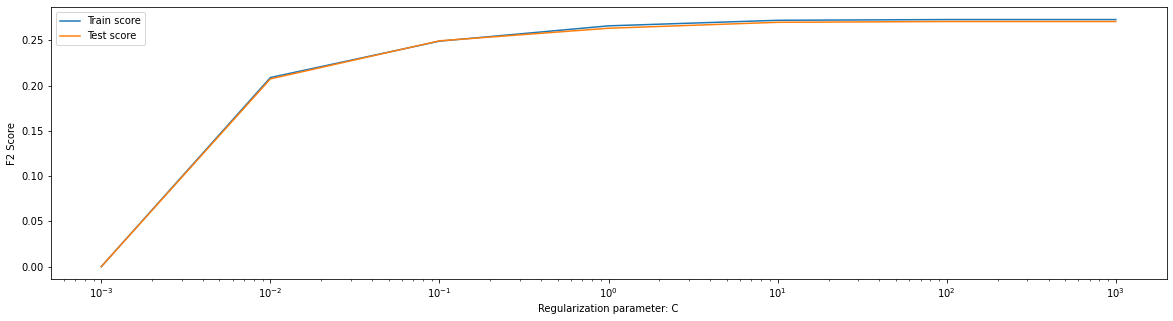

In [87]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_logreg.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_logreg.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [88]:
print('Train score: {:.4f}'.format(grid_search_logreg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_logreg.score(X_test, y_test)))

Train score: 0.2719
Test score: 0.2454


In [89]:
pred_logreg = grid_search_logreg.predict(X_test)

## Model Evaluation

In [90]:
from sklearn.metrics import confusion_matrix

confusion_logreg = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion_logreg))

Confusion matrix:
[[8986  153]
 [ 911  247]]


In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_logreg, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.62      0.21      0.32      1158

    accuracy                           0.90     10297
   macro avg       0.76      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



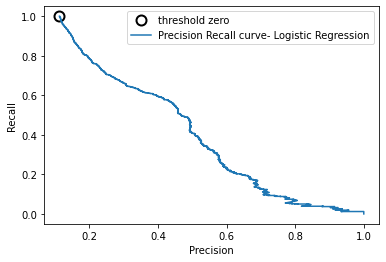

In [92]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, grid_search_logreg.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_logreg))

plt.plot(precision_logreg[close_zero], recall_logreg[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_logreg, recall_logreg, label="Precision Recall curve- Logistic Regression")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

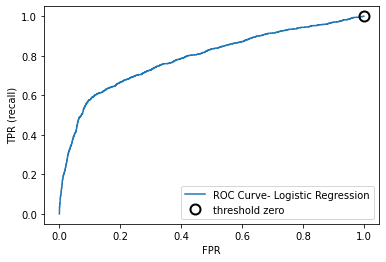

In [93]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, grid_search_logreg.predict_proba(X_test)[:, 1])

plt.plot(fpr_logreg, tpr_logreg, label="ROC Curve- Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_logreg))
plt.plot(fpr_logreg[close_zero], tpr_logreg[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Linear SVC

## Hyperparameter Tuning

In [94]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10]}


In [95]:
from sklearn.svm import LinearSVC

grid_search_linsvc = GridSearchCV(LinearSVC(), param_grid, cv=5, return_train_score=True, scoring= f2score, n_jobs= -1, verbose = 4)


In [96]:
grid_search_linsvc.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [97]:
print("Best parameters: {}".format(grid_search_linsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linsvc.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.26


In [98]:
# convert to DataFrame
results_linsvc = pd.DataFrame(grid_search_linsvc.cv_results_)
# show the first 5 rows
display(results_linsvc.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.229990,0.017577,0.006201,0.001939,0.001,{'C': 0.001},0.214021,0.219595,0.188455,0.220762,...,0.210205,0.011758,5,0.210130,0.208386,0.217263,0.209953,0.209637,0.211074,0.003154
1,0.260201,0.015381,0.004998,0.000003,0.01,{'C': 0.01},0.246749,0.254915,0.222930,0.245573,...,0.243115,0.010688,4,0.244554,0.237797,0.247331,0.241316,0.241039,0.242407,0.003261
2,0.660999,0.015492,0.005200,0.000400,0.1,{'C': 0.1},0.255390,0.263857,0.225904,0.254915,...,0.250046,0.012852,3,0.261169,0.245163,0.251520,0.249146,0.245204,0.250441,0.005886
3,5.481999,1.086954,0.004001,0.000895,1,{'C': 1},0.262810,0.271433,0.233723,0.263769,...,0.259206,0.013104,1,0.265949,0.252370,0.258678,0.256251,0.255026,0.257655,0.004618
4,8.797182,0.662516,0.003390,0.001023,10,{'C': 10},0.262810,0.268568,0.240000,0.262197,...,0.258663,0.009770,2,0.266407,0.249001,0.260996,0.253638,0.251206,0.256250,0.006488


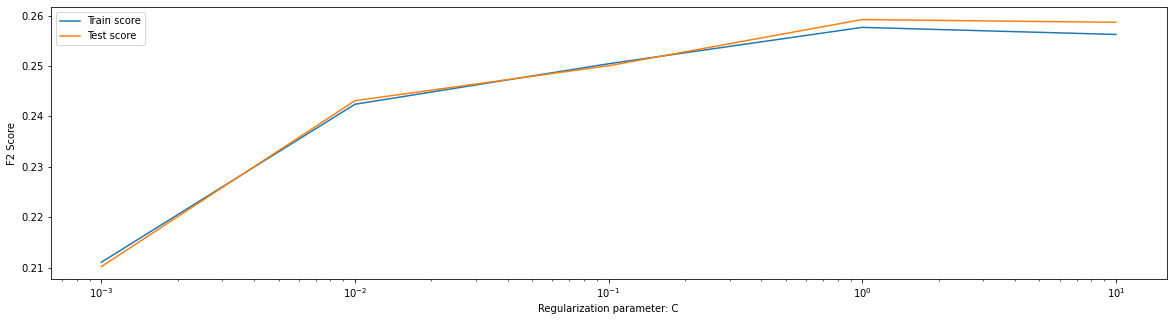

In [100]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_linsvc.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_linsvc.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [101]:
print('Train score: {:.4f}'.format(grid_search_linsvc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_linsvc.score(X_test, y_test)))

Train score: 0.2584
Test score: 0.2394


In [102]:
pred_linsvc = grid_search_linsvc.predict(X_test)

## Model Evaluation

In [103]:
from sklearn.metrics import confusion_matrix

confusion_linsvc = confusion_matrix(y_test, pred_linsvc)
print("Confusion matrix:\n{}".format(confusion_linsvc))

Confusion matrix:
[[8998  141]
 [ 918  240]]


In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_linsvc, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.63      0.21      0.31      1158

    accuracy                           0.90     10297
   macro avg       0.77      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



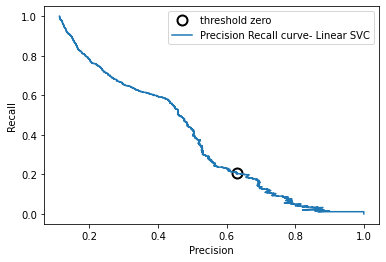

In [105]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_linsvc, recall_linsvc, thresholds_linsvc = precision_recall_curve(y_test, grid_search_linsvc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_linsvc))

plt.plot(precision_linsvc[close_zero], recall_linsvc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_linsvc, recall_linsvc, label="Precision Recall curve- Linear SVC")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

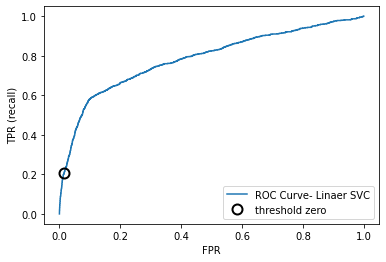

In [107]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_linsvc, tpr_linsvc, thresholds_linsvc = roc_curve(y_test, grid_search_linsvc.decision_function(X_test))

plt.plot(fpr_linsvc, tpr_linsvc, label="ROC Curve- Linaer SVC")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_linsvc))
plt.plot(fpr_linsvc[close_zero], tpr_linsvc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# SVC(kernel = 'linear')

## Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]} 

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.1, 1, 10]}


In [65]:
from sklearn.svm import SVC

grid_search_ksvclin = GridSearchCV(SVC(kernel = 'linear', cache_size =14000), param_grid, cv=2, return_train_score=True, scoring= f2score, n_jobs= -1, verbose = 4)

In [66]:
grid_search_ksvclin.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, estimator=SVC(cache_size=14000, kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10]}, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=4)

In [67]:
print("Best parameters: {}".format(grid_search_ksvclin.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ksvclin.best_score_))

Best parameters: {'C': 0.1}
Best cross-validation score: 0.25


In [68]:
# convert to DataFrame
results_ksvclin = pd.DataFrame(grid_search_ksvclin.cv_results_)
# show the first 5 rows
display(results_ksvclin.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,106.617568,23.064753,2.372501,0.224500,0.1,{'C': 0.1},0.2501,0.2405,0.2453,0.0048,1,0.2405,0.2501,0.2453,0.0048
1,440.604814,66.177901,3.006227,0.128907,1,{'C': 1},0.2501,0.2405,0.2453,0.0048,1,0.2405,0.2501,0.2453,0.0048
2,3298.628675,537.779681,3.010649,0.128353,10,{'C': 10},0.2501,0.2405,0.2453,0.0048,1,0.2405,0.2501,0.2453,0.0048


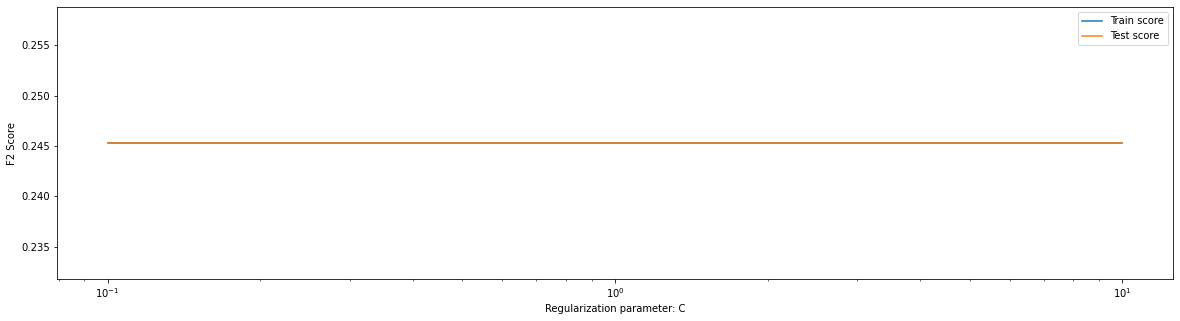

In [69]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_ksvclin.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_ksvclin.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [70]:
print('Train score: {:.4f}'.format(grid_search_ksvclin.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_ksvclin.score(X_test, y_test)))

Train score: 0.2453
Test score: 0.2275


In [71]:
pred_ksvclin = grid_search_ksvclin.predict(X_test)

## Model Evaluation

In [72]:
from sklearn.metrics import confusion_matrix

confusion_ksvclin = confusion_matrix(y_test, pred_ksvclin)
print("Confusion matrix:\n{}".format(confusion_ksvclin))

Confusion matrix:
[[8987  152]
 [ 930  228]]


In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvclin, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.60      0.20      0.30      1158

    accuracy                           0.89     10297
   macro avg       0.75      0.59      0.62     10297
weighted avg       0.87      0.89      0.87     10297



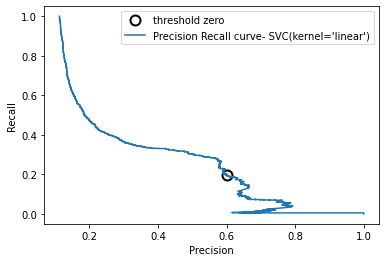

In [74]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvclin, recall_ksvclin, thresholds_ksvclin = precision_recall_curve(y_test, grid_search_ksvclin.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvclin))

plt.plot(precision_ksvclin[close_zero], recall_ksvclin[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvclin, recall_ksvclin, label="Precision Recall curve- SVC(kernel='linear')")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

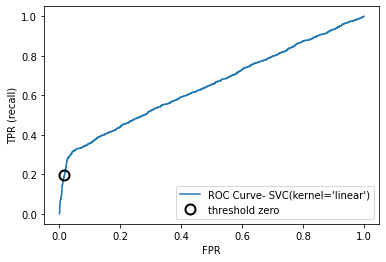

In [75]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvclin, tpr_ksvclin, thresholds_ksvclin = roc_curve(y_test, grid_search_ksvclin.decision_function(X_test))

plt.plot(fpr_ksvclin, tpr_ksvclin, label="ROC Curve- SVC(kernel='linear')")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvclin))
plt.plot(fpr_ksvclin[close_zero], tpr_ksvclin[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# SVC(kernel = 'poly')

## Hyperparameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV

#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}   -Best C= 1

#Rerun with reduced param set
#param_grid = {'C': [0.7, 1, 1.5, 2]}
param_grid = {'C': [0.7, 1, 1.5, 2]}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.7, 1, 1.5, 2]}


In [67]:
from sklearn.svm import SVC

random_search_ksvcpoly = RandomizedSearchCV(SVC(kernel= 'poly', degree=3, cache_size= 14000), param_grid, cv= 2, scoring =f2score, return_train_score=True, n_jobs= -1, verbose = 4)

In [68]:
random_search_ksvcpoly.fit(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits


RandomizedSearchCV(cv=2, estimator=SVC(cache_size=14000, kernel='poly'),
                   n_jobs=-1, param_distributions={'C': [0.7, 1, 1.5, 2]},
                   return_train_score=True,
                   scoring=make_scorer(fbeta_score, beta=2), verbose=4)

In [69]:
print("Best parameters: {}".format(random_search_ksvcpoly.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search_ksvcpoly.best_score_))

Best parameters: {'C': 2}
Best cross-validation score: 0.29


In [70]:
# convert to DataFrame
results_ksvcpoly = pd.DataFrame(random_search_ksvcpoly.cv_results_)
# show the first 5 rows
display(results_ksvcpoly.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,98.727380,1.001053,5.127539,0.525986,0.7,{'C': 0.7},0.262637,0.234626,0.248631,0.014006,4,0.291044,0.255708,0.273376,0.017668
1,112.004582,7.034624,3.604524,0.924529,1,{'C': 1},0.291585,0.242731,0.267158,0.024427,3,0.317137,0.288219,0.302678,0.014459
2,125.001519,2.986246,2.242613,0.295614,1.5,{'C': 1.5},0.309992,0.257158,0.283575,0.026417,2,0.342510,0.327275,0.334893,0.007618
3,130.193757,1.468002,1.932485,0.040484,2,{'C': 2},0.317215,0.263471,0.290343,0.026872,1,0.359745,0.342178,0.350961,0.008784


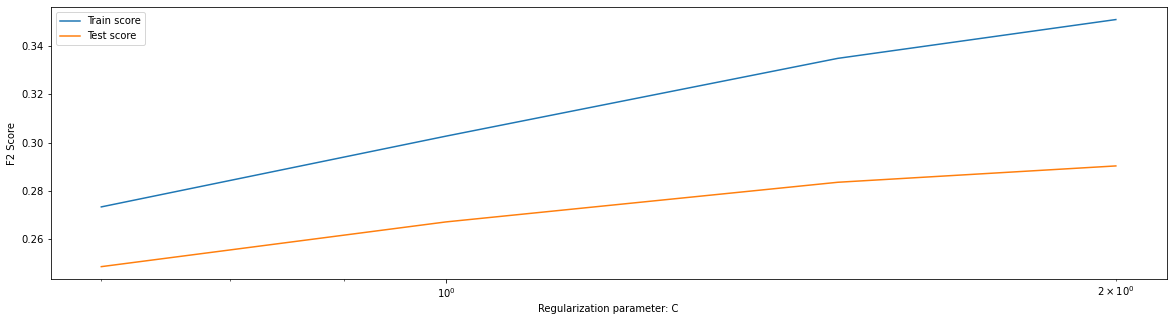

In [71]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_ksvcpoly.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_ksvcpoly.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [73]:
print('Train score: {:.4f}'.format(random_search_ksvcpoly.score(X_train, y_train)))
print('Test score: {:.4f}'.format(random_search_ksvcpoly.score(X_test, y_test)))

Train score: 0.3354
Test score: 0.2777


In [74]:
pred_ksvcpoly = random_search_ksvcpoly.predict(X_test)

## Model Evaluation

In [75]:
from sklearn.metrics import confusion_matrix

confusion_ksvcpoly = confusion_matrix(y_test, pred_ksvcpoly)
print("Confusion matrix:\n{}".format(confusion_ksvcpoly))

Confusion matrix:
[[8976  163]
 [ 876  282]]


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvcpoly, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95      9139
         yes       0.63      0.24      0.35      1158

    accuracy                           0.90     10297
   macro avg       0.77      0.61      0.65     10297
weighted avg       0.88      0.90      0.88     10297



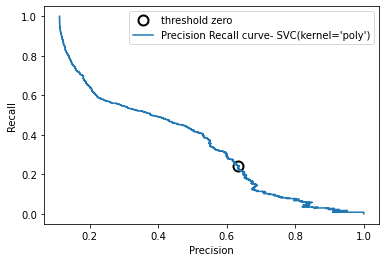

In [77]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvcpoly, recall_ksvcpoly, thresholds_ksvcpoly = precision_recall_curve(y_test, random_search_ksvcpoly.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcpoly))

plt.plot(precision_ksvcpoly[close_zero], recall_ksvcpoly[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvcpoly, recall_ksvcpoly, label="Precision Recall curve- SVC(kernel='poly')")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

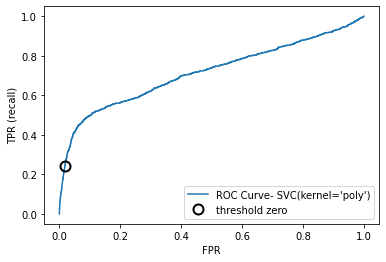

In [78]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvcpoly, tpr_ksvcpoly, thresholds_ksvcpoly = roc_curve(y_test, random_search_ksvcpoly.decision_function(X_test))

plt.plot(fpr_ksvcpoly, tpr_ksvcpoly, label="ROC Curve- SVC(kernel='poly')")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcpoly))
plt.plot(fpr_ksvcpoly[close_zero], tpr_ksvcpoly[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# SVC(kernel = 'rbf')

## Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}


In [80]:
from sklearn.svm import SVC

grid_search_ksvcrbf = GridSearchCV(SVC(kernel = 'rbf', cache_size =14000), param_grid, cv=2, scoring= f2score, return_train_score=True, n_jobs= -1, verbose = 4)

In [81]:
grid_search_ksvcrbf.fit(X_train, y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


GridSearchCV(cv=2, estimator=SVC(cache_size=14000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [82]:
print("Best parameters: {}".format(grid_search_ksvcrbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ksvcrbf.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.29


In [83]:
# convert to DataFrame
results_ksvcrbf = pd.DataFrame(grid_search_ksvcrbf.cv_results_)
# show the first 5 rows
display(results_ksvcrbf.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,15.530499,0.011501,15.303999,0.089000,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
1,16.935000,1.600003,16.094499,0.876499,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
2,17.275494,1.447502,17.231999,1.822000,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
3,16.103499,0.044501,15.630001,0.003999,0.001,1,"{'C': 0.001, 'gamma': 1}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
4,17.293499,1.448502,17.324000,1.688999,0.001,10,"{'C': 0.001, 'gamma': 10}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0


In [86]:
print('Train score: {:.4f}'.format(grid_search_ksvcrbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_ksvcrbf.score(X_test, y_test)))

Train score: 0.3935
Test score: 0.2769


In [87]:
pred_ksvcrbf = grid_search_ksvcrbf.predict(X_test)

## Model Evaluation

In [88]:
from sklearn.metrics import confusion_matrix

confusion_ksvcrbf = confusion_matrix(y_test, pred_ksvcrbf)
print("Confusion matrix:\n{}".format(confusion_ksvcrbf))

Confusion matrix:
[[8961  178]
 [ 876  282]]


In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvcrbf, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.61      0.24      0.35      1158

    accuracy                           0.90     10297
   macro avg       0.76      0.61      0.65     10297
weighted avg       0.88      0.90      0.88     10297



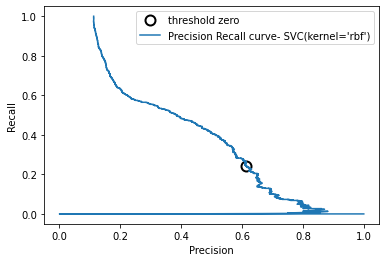

In [90]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvcrbf, recall_ksvcrbf, thresholds_ksvcrbf = precision_recall_curve(y_test, grid_search_ksvcrbf.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcrbf))

plt.plot(precision_ksvcrbf[close_zero], recall_ksvcrbf[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvcrbf, recall_ksvcrbf, label="Precision Recall curve- SVC(kernel='rbf')")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

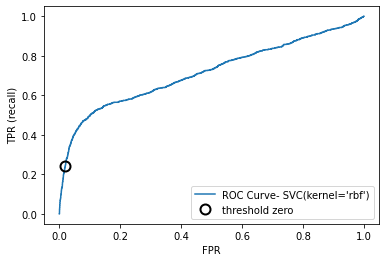

In [91]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvcrbf, tpr_ksvcrbf, thresholds_ksvcrbf = roc_curve(y_test, grid_search_ksvcrbf.decision_function(X_test))

plt.plot(fpr_ksvcrbf, tpr_ksvcrbf, label="ROC Curve- SVC(kernel='rbf')")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcrbf))
plt.plot(fpr_ksvcrbf[close_zero], tpr_ksvcrbf[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Decision Tree Classifier

## Hyperparameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90], 
              'criterion': ['entropy','gini']}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90], 'criterion': ['entropy', 'gini']}


In [94]:
from sklearn.tree import DecisionTreeClassifier

grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv=5, return_train_score=True, n_jobs= -1, verbose = 4)

In [96]:
grid_search_dtree.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90]},
             return_train_score=True, verbose=4)

In [97]:
print("Best parameters: {}".format(grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 6}
Best cross-validation score: 0.90


In [98]:
# convert to DataFrame
results_dtree = pd.DataFrame(grid_search_dtree.cv_results_)
# show the first 5 rows
display(results_dtree.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.463796,0.059915,0.009201,0.004995,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.899175,0.900453,0.897378,...,0.899906,0.001600,5,0.901586,0.900821,0.901954,0.901388,0.901307,0.901411,0.000370
1,0.535598,0.045454,0.006201,0.000979,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.897556,0.901910,0.898835,...,0.900942,0.002585,2,0.904662,0.903290,0.903654,0.904018,0.903290,0.903783,0.000516
2,0.449599,0.078075,0.007000,0.000895,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.899660,0.902719,0.900939,...,0.901525,0.001687,1,0.906280,0.904666,0.905232,0.905515,0.904787,0.905296,0.000579
3,0.515398,0.021323,0.007000,0.000634,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.895452,0.903367,0.896407,...,0.898741,0.002774,7,0.907697,0.907781,0.907741,0.908105,0.907013,0.907667,0.000358
4,0.621800,0.054998,0.007399,0.000800,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.893834,0.901101,0.896245,...,0.897640,0.002480,9,0.910408,0.910938,0.910209,0.910169,0.910776,0.910500,0.000307


In [102]:
print('Train score: {:.4f}'.format(grid_search_dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_dtree.score(X_test, y_test)))

Train score: 0.9050
Test score: 0.8996


In [103]:
dtree = DecisionTreeClassifier(random_state = 0, criterion='entropy'  , max_depth=6)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

[Text(173.73509174311926, 201.90857142857143, 'X[12] <= 0.469\nentropy = 0.508\nsamples = 30891\nvalue = [27409, 3482]'),
 Text(86.00366972477065, 170.84571428571428, 'X[6] <= 0.514\nentropy = 0.99\nsamples = 3767\nvalue = [2103, 1664]'),
 Text(45.305504587155966, 139.78285714285715, 'X[45] <= 0.5\nentropy = 0.862\nsamples = 927\nvalue = [264, 663]'),
 Text(24.572477064220184, 108.72, 'X[9] <= 0.097\nentropy = 0.821\nsamples = 749\nvalue = [192, 557]'),
 Text(12.286238532110092, 77.65714285714284, 'X[11] <= 0.052\nentropy = 0.958\nsamples = 171\nvalue = [65, 106]'),
 Text(6.143119266055046, 46.59428571428572, 'X[11] <= 0.049\nentropy = 0.903\nsamples = 116\nvalue = [37, 79]'),
 Text(3.071559633027523, 15.531428571428563, 'entropy = 0.933\nsamples = 106\nvalue = [37, 69]'),
 Text(9.21467889908257, 15.531428571428563, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(18.42935779816514, 46.59428571428572, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 55\nvalue = [28, 27]'),
 Text(15.3577981

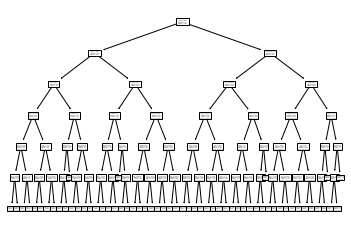

In [109]:
from sklearn import tree
tree.plot_tree(dtree)

In [110]:
pred_dtree = grid_search_dtree.predict(X_test)

## Model Evaluation

In [111]:
from sklearn.metrics import confusion_matrix

confusion_dtree = confusion_matrix(y_test, pred_dtree)
print("Confusion matrix:\n{}".format(confusion_dtree))

Confusion matrix:
[[9003  136]
 [ 898  260]]


In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_dtree, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      9139
         yes       0.66      0.22      0.33      1158

    accuracy                           0.90     10297
   macro avg       0.78      0.60      0.64     10297
weighted avg       0.88      0.90      0.88     10297



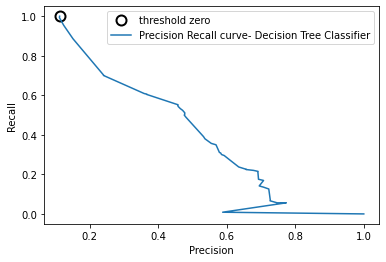

In [113]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_dtree, recall_dtree, thresholds_dtree = precision_recall_curve(y_test, dtree.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_dtree))

plt.plot(precision_dtree[close_zero], recall_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_dtree, recall_dtree, label="Precision Recall curve- Decision Tree Classifier")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

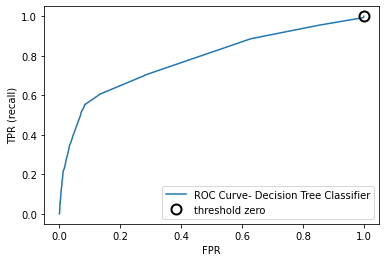

In [115]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, dtree.predict_proba(X_test)[:, 1])

plt.plot(fpr_dtree, tpr_dtree, label="ROC Curve- Decision Tree Classifier")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_dtree))
plt.plot(fpr_dtree[close_zero], tpr_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Comparing Models

In [86]:
print("f2 score- K Neighbors Classifier: {:.2f}".format(grid_search_knn.best_score_))
print("f2 score- Logistic Regression: {:.2f}".format(grid_search_logreg.best_score_))
print("f2 score- Linear SVC: {:.2f}".format(grid_search_linsvc.best_score_))
print("f2 score- SVC(kernel='linear'): {:.2f}".format(grid_search_ksvclin.best_score_))
print("f2 score- SVC(kernel='poly'): {:.2f}".format(grid_search_ksvcpoly.best_score_))
print("f2 score- SVC(kernel='rbf'): {:.2f}".format(grid_search_ksvcrbf.best_score_))
print("f2 score- Decision Tree: {:.2f}".format(grid_search_dtree.best_score_))

f2 score- K Neighbors Classifier: 0.24
f2 score- Logistic Regression: 0.27
f2 score- Linear SVC: 0.26
f2 score- SVC(kernel='linear'): 0.25
f2 score- SVC(kernel='poly'): 0.29
f2 score- SVC(kernel='rbf'): 0.29
f2 score- Decision Tree: 0.90


## Best Model
The decision tree model is the best model with the highest score as shown above.

# Over sampling Imbalanced data using SMOTE

In [70]:
#!pip install imblearn

In [66]:
y_train.value_counts()

0    27409
1     3482
Name: y, dtype: int64

The dataset is imbalanced. We use SMOTE to oversample the dataset to get better results

Oversampling the train data:

In [71]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)

In [72]:
y_train_s.value_counts()

0    27409
1    27409
Name: y, dtype: int64

## Running best model on balanced data

In [69]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90], 
              'criterion': ['entropy','gini']}


print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90], 'criterion': ['entropy', 'gini']}


In [91]:
from sklearn.tree import DecisionTreeClassifier

grid_search_dtree_s = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv=5, return_train_score=True, n_jobs= -1, verbose = 4)

In [92]:
grid_search_dtree_s.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90]},
             return_train_score=True, verbose=4)

In [94]:
print("Best parameters: {}".format(grid_search_dtree_s.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree_s.best_score_))

Best parameters: {'criterion': 'gini', 'max_depth': 20}
Best cross-validation score: 0.90


In [95]:
# convert to DataFrame
results_dtree_s = pd.DataFrame(grid_search_dtree_s.cv_results_)
# show the first 5 rows
display(results_dtree_s.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.665998,0.026239,0.008202,0.001166,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.752463,0.790952,0.792868,...,0.783557,0.015802,31,0.791558,0.782164,0.781707,0.783286,0.781165,0.783976,0.003855
1,0.906198,0.137470,0.009601,0.002247,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.751186,0.790952,0.790496,...,0.782772,0.016011,32,0.791786,0.782232,0.781981,0.783286,0.781165,0.784090,0.003907
2,0.990396,0.083935,0.011002,0.001264,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.767694,0.830810,0.833637,...,0.817396,0.025191,28,0.838760,0.817964,0.817234,0.813339,0.813864,0.820232,0.009439
3,0.941197,0.106946,0.009799,0.002786,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.750912,0.836921,0.839657,...,0.823708,0.037055,26,0.847357,0.826196,0.823688,0.824627,0.831148,0.830603,0.008763
4,0.936998,0.082884,0.006999,0.001096,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.758026,0.862003,0.863827,...,0.842917,0.043052,24,0.871870,0.846833,0.848566,0.841250,0.853951,0.852494,0.010502


# Final Model

Training model with entire X_train_s using best parameters and predict the target values for y_test

In [73]:
from sklearn.tree import DecisionTreeClassifier

final_model = DecisionTreeClassifier(criterion='gini', max_depth=20 , random_state = 0)

In [74]:
final_model.fit(X_train_s, y_train_s)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [75]:
print('Train score: {:.4f}'.format(final_model.score(X_train_s, y_train_s)))
print('Test score: {:.4f}'.format(final_model.score(X_test, y_test)))

Train score: 0.9815
Test score: 0.8580


[Text(118.54882814963229, 212.26285714285714, 'X[12] <= 0.512\ngini = 0.5\nsamples = 54818\nvalue = [27409, 27409]'),
 Text(32.15397630423045, 201.90857142857143, 'X[4] <= 0.0\ngini = 0.232\nsamples = 15705\nvalue = [2103, 13602]'),
 Text(5.493748522062648, 191.5542857142857, 'X[34] <= 0.005\ngini = 0.499\nsamples = 800\nvalue = [379, 421]'),
 Text(2.8197767723424714, 181.2, 'X[6] <= 0.014\ngini = 0.498\nsamples = 712\nvalue = [377, 335]'),
 Text(0.6333611842416408, 170.84571428571428, 'X[6] <= 0.003\ngini = 0.238\nsamples = 123\nvalue = [17, 106]'),
 Text(0.5489130263427553, 160.49142857142857, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7178093421405262, 160.49142857142857, 'X[7] <= 0.428\ngini = 0.206\nsamples = 120\nvalue = [14, 106]'),
 Text(0.42224078949442717, 150.13714285714286, 'X[11] <= 0.004\ngini = 0.152\nsamples = 109\nvalue = [9, 100]'),
 Text(0.2533444736966563, 139.78285714285715, 'X[26] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.1688963157977

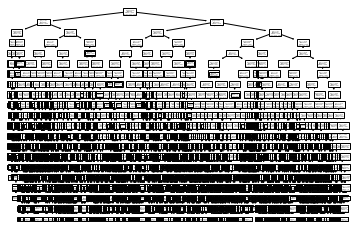

In [76]:
from sklearn import tree
tree.plot_tree(final_model)

In [77]:
pred_final = final_model.predict(X_test)

In [78]:
pred_final

array([0, 0, 0, ..., 0, 0, 0])

## Model Evaluation

In [81]:
f2score(final_model)

TypeError: __call__() missing 2 required positional arguments: 'X' and 'y_true'

In [104]:
from sklearn.metrics import confusion_matrix

confusion_final = confusion_matrix(y_test, pred_final)
print("Confusion matrix:\n{}".format(confusion_final))

Confusion matrix:
[[8400  739]
 [ 767  391]]


Number of False negatives have been drastically decreased compared to previous models which can prove to be valuable for this classification task.
Using this model, more clients who would actually subscribe for the term deposit in the future would be predicted as subscriber.

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_final, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.92      0.92      0.92      9139
         yes       0.35      0.34      0.34      1158

    accuracy                           0.85     10297
   macro avg       0.63      0.63      0.63     10297
weighted avg       0.85      0.85      0.85     10297



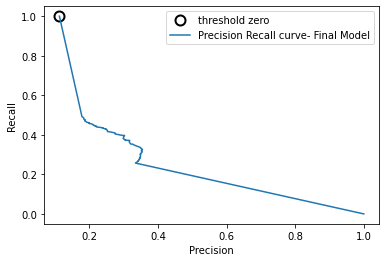

In [106]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_final, recall_final, thresholds_final = precision_recall_curve(y_test, final_model.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_final))

plt.plot(precision_final[close_zero], recall_final[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_final, recall_final, label="Precision Recall curve- Final Model")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

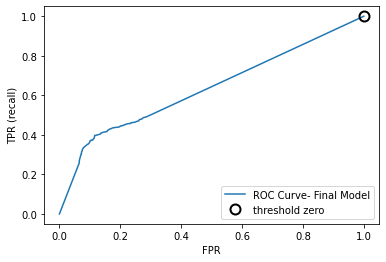

In [107]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_final, tpr_final, thresholds_final = roc_curve(y_test, final_model.predict_proba(X_test)[:, 1])

plt.plot(fpr_final, tpr_final, label="ROC Curve- Final Model")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_final))
plt.plot(fpr_final[close_zero], tpr_final[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)